In [ ]:
!pip install opencv-contrib-python

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
data_train = files.upload()

Saving indonesiaMoney_dataTrain.jpg to indonesiaMoney_dataTrain.jpg


In [ ]:
data_test = files.upload()

Saving indonesiaMoney_dataTest.jpg to indonesiaMoney_dataTest.jpg


## Train Image

array([[[200, 204, 128],
        [198, 202, 126],
        [201, 205, 128],
        ...,
        [209, 212, 131],
        [208, 211, 130],
        [206, 209, 128]],

       [[235, 239, 163],
        [235, 239, 163],
        [234, 238, 162],
        ...,
        [211, 214, 133],
        [211, 214, 135],
        [212, 215, 134]],

       [[206, 210, 136],
        [210, 214, 140],
        [210, 214, 140],
        ...,
        [233, 236, 157],
        [232, 235, 158],
        [233, 236, 157]],

       ...,

       [[185, 188, 121],
        [185, 188, 121],
        [182, 185, 118],
        ...,
        [173, 174, 117],
        [173, 174, 117],
        [182, 183, 125]],

       [[219, 221, 158],
        [218, 220, 157],
        [216, 217, 157],
        ...,
        [193, 193, 139],
        [190, 190, 136],
        [197, 198, 141]],

       [[191, 192, 132],
        [191, 192, 132],
        [189, 190, 132],
        ...,
        [200, 200, 148],
        [195, 195, 141],
        [202, 202, 148]]], dtype=uint8)
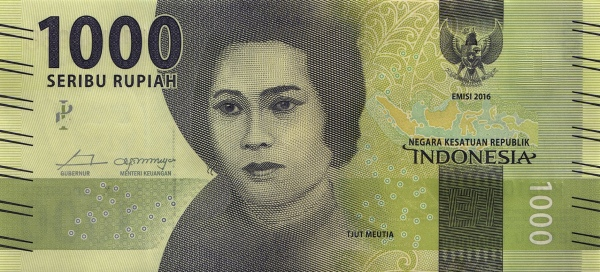

In [ ]:
train_image = cv2.imread("indonesiaMoney_dataTrain.jpg")
train_image = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)
train_image

array([[[240, 255, 255],
        [251, 239, 243],
        [255, 253, 255],
        ...,
        [195, 103, 108],
        [184,  93,  98],
        [187, 101, 104]],

       [[255, 247, 254],
        [252, 200, 222],
        [241, 198, 217],
        ...,
        [194, 103, 108],
        [202, 110, 115],
        [195, 103, 108]],

       [[255, 251, 255],
        [243, 200, 220],
        [234, 196, 217],
        ...,
        [190, 101, 107],
        [197, 106, 113],
        [187,  96, 103]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
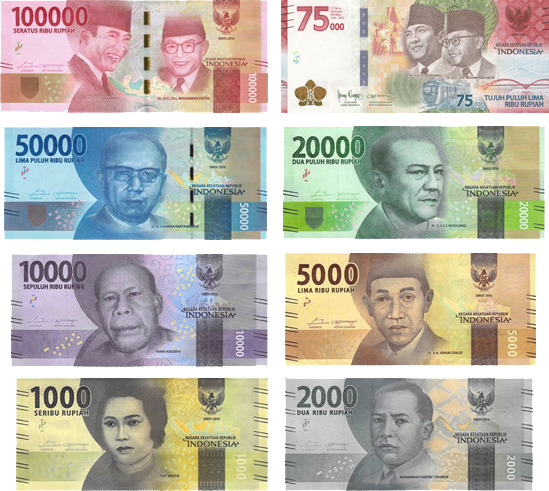

In [ ]:
test_image = cv2.imread("indonesiaMoney_dataTest.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image

## SIFT

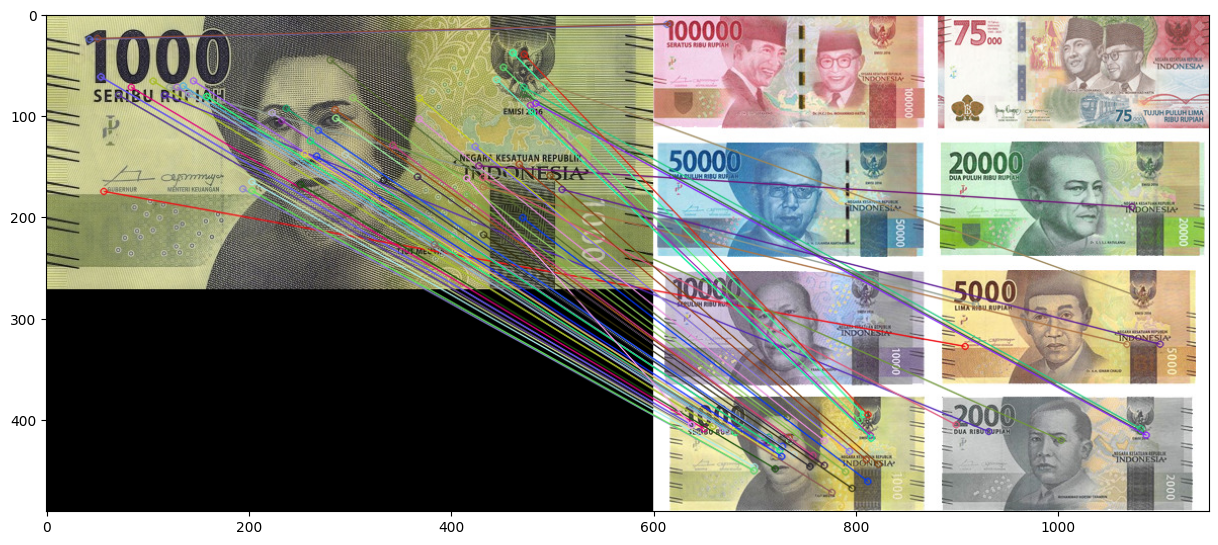

In [ ]:
sift = cv2.SIFT_create() # Membuat objek detektor SIFT untuk mendeteksi titik kunci dari gambar

#kp -> key point, menyimpan titik kunci yang terdeteksi
#des -> deskriptor, merepresentasikan fitur yang ditemukan pada gambar
kp1, des1 = sift.detectAndCompute(train_image, None)
kp2, des2 = sift.detectAndCompute(test_image, None)

bf = cv2.BFMatcher() # Brute-force Matcher, mencocokkan deskriptor dari dua gambar
matches = bf.knnMatch(des1, des2, k=2) # Mencari pencocokan terbaik dengan algorimta k-NN

# Ratio Test
good = []
for m, n in matches:
    # Jika jarak deskriptor pertama (m.distance) lebih kecil daripada 75% dari jarak deskriptor kedua (n.distance), maka pencocokan dianggap baik
    if m.distance < 0.75 * n.distance:
        good.append([m])

# Menggambar 100 pencocokan terbaik antara keypoint dari train image dan test image
img3 = cv2.drawMatchesKnn(train_image, kp1, test_image, kp2, good[:100], None, flags=2)

# 90 dari 100 titik pencocokan yang tergambar mengarah ke uang seribu rupiah
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
ax.imshow(img3)
plt.show()